# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, you'll practice your knowledge of correlation, autocorrelation, and partial autocorrelation by working on three different datasets. 

## Objectives

In this lab you will: 

- Plot and discuss the autocorrelation function (ACF) for a time series 
- Plot and discuss the partial autocorrelation function (PACF) for a time series 

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. 

- First, run the following cell to import all the libraries and the functions required for this lab 
- Then import the data in `'exch_rates.csv'` 
- Change the data type of the `'Frequency'` column 
- Set the `'Frequency'` column as the index of the DataFrame 

In [1]:
# Import all packages and functions
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
from jupyterthemes import jtplot
jtplot.style()

In [2]:
# Import data
xr = pd.read_csv('exch_rates.csv')

# Change the data type of the 'Frequency' column 
xr.Frequency = pd.to_datetime(xr.Frequency)

# Set the 'Frequency' column as the index
xr.set_index('Frequency', inplace=True)

xr.head()

,Euro,Australian Dollar,Danish Krone
Frequency,,,
2000-01-01,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN
2000-01-03,0.991080,1.520912,7.374034
2000-01-04,0.970403,1.521300,7.222610
2000-01-05,0.964506,1.521316,7.180170


Plot all three exchange rates in one graph: 

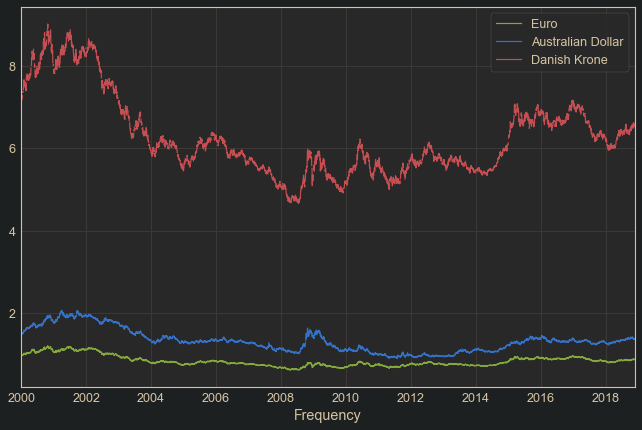

In [3]:
# Plot here
xr.plot(figsize=(11,7))

You can see that the EUR/USD and AUD/USD exchange rates are somewhere between 0.5 and 2, whereas the Danish Krone is somewhere between 4.5 and 9. Now let's look at the correlations between these time series. 

In [4]:
# Correlation
xr.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.

In [ ]:
# Even before differening, the correlation scores are showing strong correlation. This would
# make sense, since all of these exchange rates are against the US dollar, meaning that as the
# dollar gains and loses value, all three of these exchange rates will change simultaneously.
# The near 1 correlation between the Danish Krone and the Euro, upon further research, is 
# revealed to be due to the fact that the Krone is pegged to the Euro.

Next, look at the plots of the differenced (1-lag) series. Use subplots to plot them rather than creating just one plot. 

In [6]:
# 1-lag differenced series 
xr_diff = xr.diff()

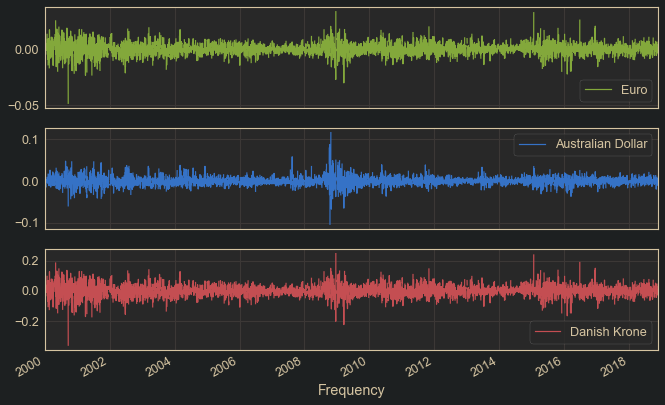

In [14]:
import warnings
warnings.filterwarnings('ignore')
# Plot
xr_diff.plot(figsize=(11,7), subplots=True);

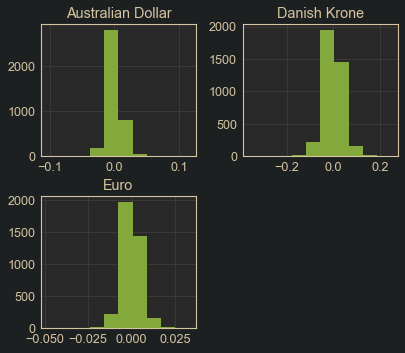

In [65]:
xr_diff.hist();

Calculate the correlation of this differenced time series. 

In [15]:
# Correlation 
xr_diff.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.545369,0.999667
Australian Dollar,0.545369,1.000000,0.545133
Danish Krone,0.999667,0.545133,1.000000


### Explain what's going on

In [ ]:
# This has reduced the correlation score between the Australian Dollar and the other two.
# The differencing has removed the shared day to day movement of the exchange rates, and has left
# just the noise behind, which decreased the correlation of the non-pegged currencies.

Next, let's look at the "lag-1 autocorrelation" for the EUR/USD exchange rate. 

- Create a "lag-1 autocorrelation" series 
- Combine both the original and the shifted ("lag-1 autocorrelation") series into a DataFrame 
- Plot these time series, and look at the correlation coefficient 

In [16]:
# Isolate the EUR/USD exchange rate
eur = xr[['Euro']]

# "Shift" the time series by one period
eur_shift_1 = eur.shift()

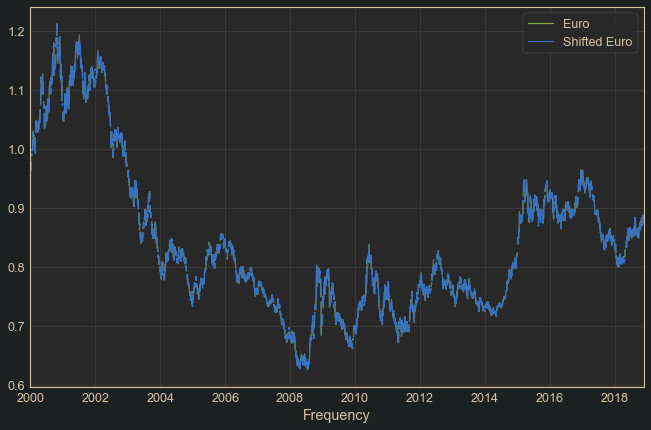

In [20]:
# Combine the original and shifted time series
lag_1 = pd.concat([eur, eur_shift_1], axis=1)
lag_1.columns = ['Euro', 'Shifted Euro']

# Plot 
lag_1.plot(figsize=(11,7))

In [21]:
# Correlation
lag_1.corr()

,Euro,Shifted Euro
Euro,1.000000,0.999146
Shifted Euro,0.999146,1.000000


Repeat this for a "lag-50 autocorrelation". 

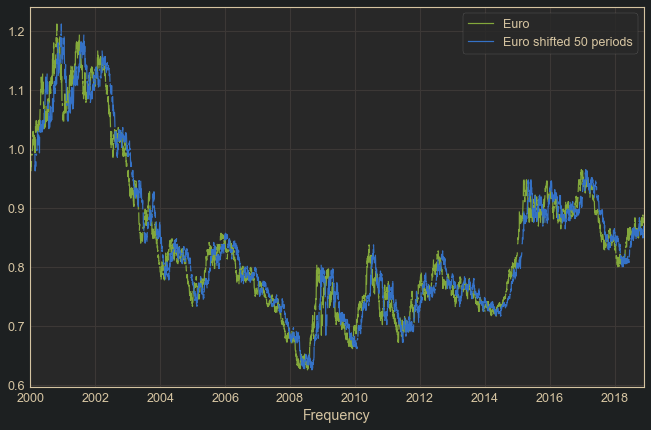

In [23]:
# "Shift" the time series by 50 periods
eur_shift_50 = eur.shift(50)

# Combine the original and shifted time series
lag_50 = pd.concat([eur, eur_shift_50], axis=1)
lag_50.columns = ['Euro', 'Euro shifted 50 periods']

# Plot
lag_50.plot(figsize=(11,7))

In [25]:
# Correlation
lag_50.corr()

,Euro,Euro shifted 50 periods
Euro,1.000000,0.968321
Euro shifted 50 periods,0.968321,1.000000


### What's your conclusion here?

In [ ]:
# Even after shifting 50 periods, the exchange rates are still highly correlated from one column
# to the other. The correlation is not as strong, which means that the initial high correlation
# from day to day is deteriorating, and most of the correlation seen at 50 days can be described
# by the one day lag.

Knowing this, let's plot the ACF now.

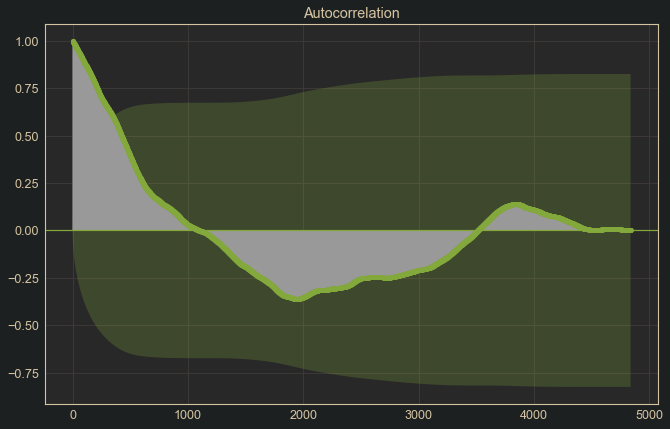

In [37]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(11,7))
plot_acf(eur.dropna(), lags=len(eur.dropna())-1, ax=ax);

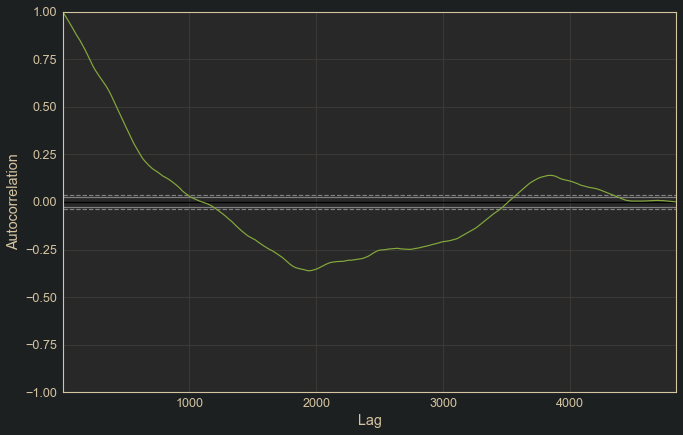

In [43]:
plt.figure(figsize=(11,7))
pd.plotting.autocorrelation_plot(eur.dropna())
plt.grid(True)

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the partial autocorrelation function plot.

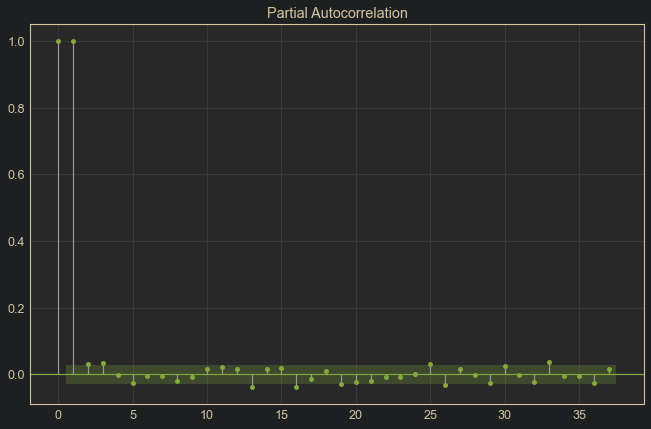

In [45]:
# Plot PACF
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(11,7))
pacf = plot_pacf(eur.dropna(), 
                 #lags=len(eur.dropna())-1, 
                 ax=ax)

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for random walk series!

## The Airpassenger Data

Let's work with the air passenger dataset you have seen before. Plot the ACF and PACF for both the differenced and regular series. 

> Note: When plotting the PACF, make sure you specify `method='ywm'` in order to avoid any warnings. 

In [46]:
# Import and process the air passenger data
air = pd.read_csv('passengers.csv')
air['Month'] = pd.to_datetime(air['Month'])
air.set_index('Month', inplace=True)
air.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


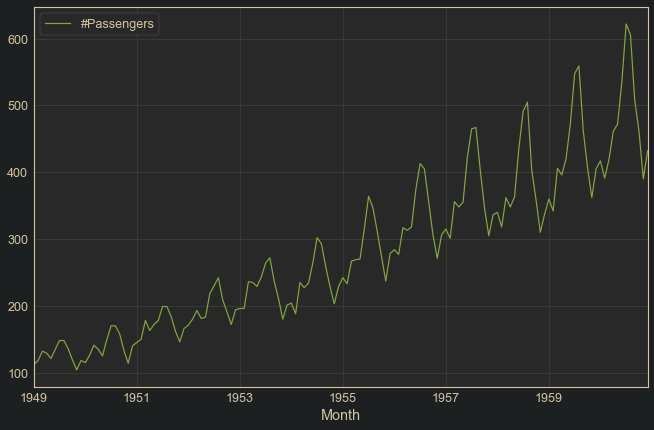

In [48]:
air.plot(figsize=(11,7))

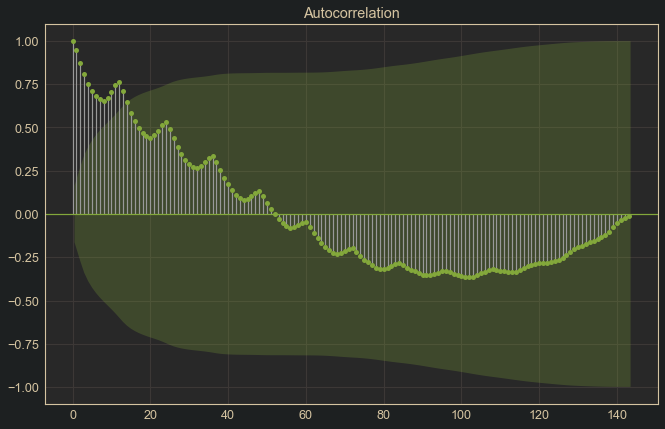

In [47]:
# Plot ACF (regular)
fig, ax = plt.subplots(figsize=(11,7))
plot_acf(air.dropna(), lags=len(air.dropna())-1, ax=ax);

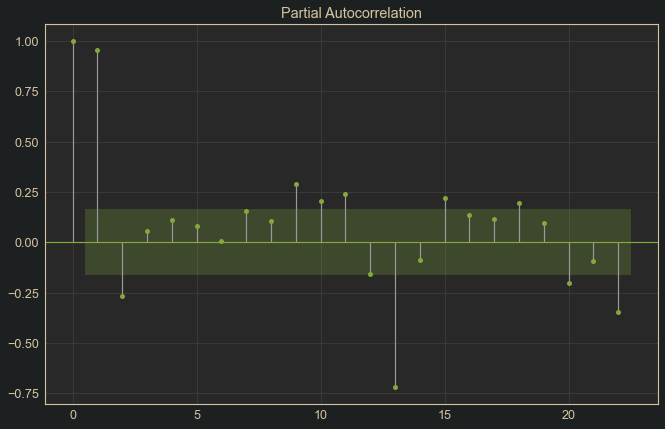

In [49]:
# Plot PACF (regular)
fig, ax = plt.subplots(figsize=(11,7))
pacf = plot_pacf(air.dropna(), 
                 #lags=len(air.dropna())-1, 
                 ax=ax)

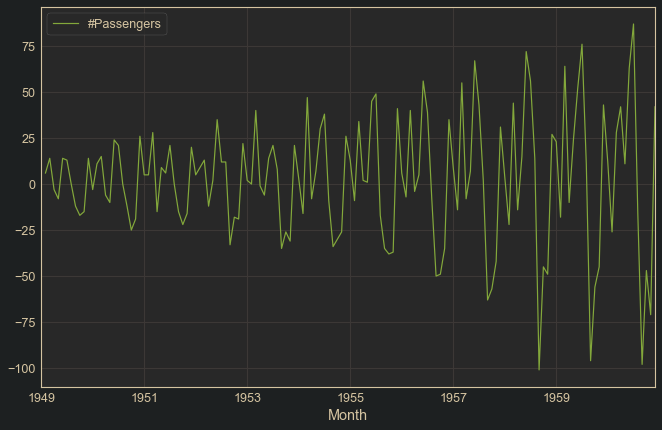

In [50]:
# Generate a differenced series
air_diff = air.diff()
air_diff.plot(figsize=(11,7))

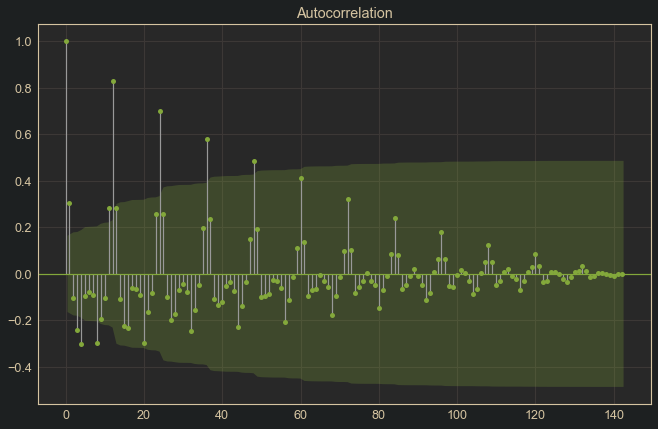

In [51]:
# Plot ACF (differenced)
fig, ax = plt.subplots(figsize=(11,7))
plot_acf(air_diff.dropna(), lags=len(air_diff.dropna())-1, ax=ax);

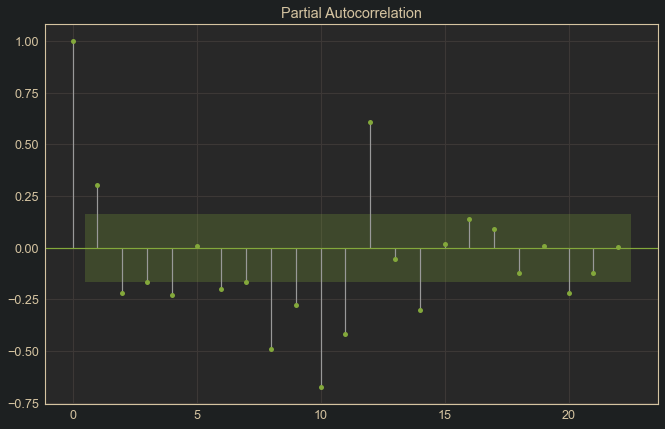

In [56]:
# Plot PACF (differenced)
fig, ax = plt.subplots(figsize=(11,7))
pacf = plot_pacf(air_diff.dropna(), 
                 #lags=len(air_diff)-1, 
                 #lags=37,
                 ax=ax)

### Your conclusion here

In [ ]:
# The Autocorrelation correlogram shows seasonal correlations.
# The Partial Autocorrelation shows a significant aount of correlation at 1, 8, 10, 11, 12, 14,
# and 20 lags. This shows that the data is likely not to be a random walk, which is easily seen
# in the original plot.

## The NYSE data

Are you getting the hang of interpreting ACF and PACF plots? For one final time, plot the ACF and PACF for both the NYSE time series. 

> Note: When plotting the PACF, make sure you specify `method='ywm'` in order to avoid any warnings. 

In [57]:
# Import and process the NYSE data
nyse = pd.read_csv('NYSE_monthly.csv') 
nyse['Month'] = pd.to_datetime(nyse['Month'])
nyse.set_index('Month', inplace=True)
nyse.head()

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042


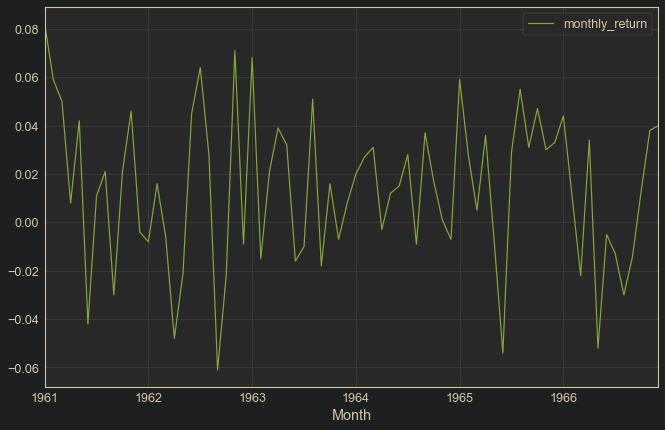

In [58]:
nyse.plot(figsize=(11,7))

In [59]:
nyse.isna().sum()

monthly_return    0
dtype: int64

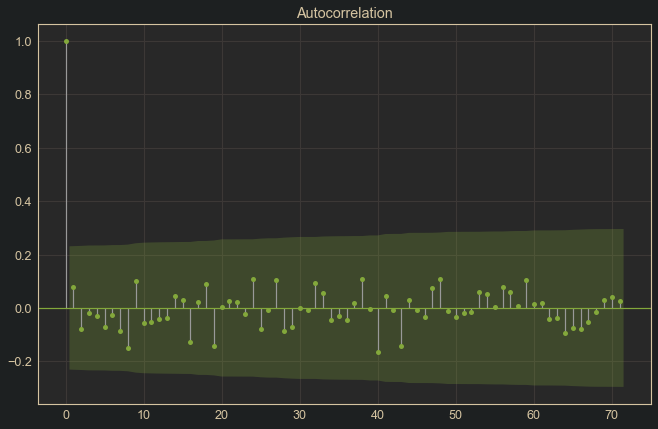

In [61]:
# Plot ACF
fig, ax = plt.subplots(figsize=(11,7))
acf = plot_acf(nyse, lags=len(nyse)-1, ax=ax)

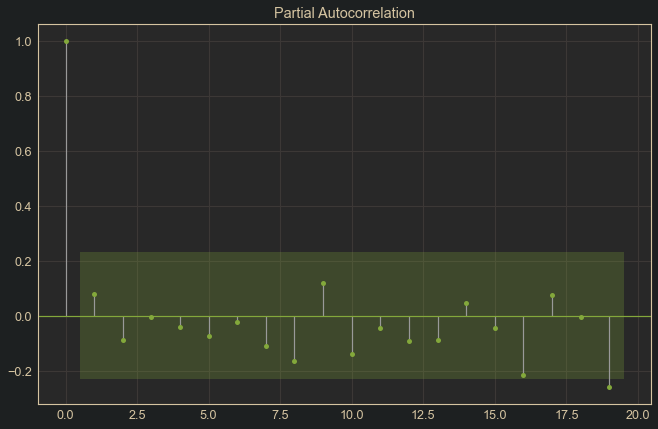

In [63]:
# Plot PACF
fig, ax = plt.subplots(figsize=(11,7))
pacf = plot_pacf(nyse, 
                 #lags=len(nyse)-1, 
                 ax=ax)

## Your conclusion here

In [ ]:
# With the NYSE data, not even a 1 period lag has significant correlation, meaning it is truly
# a random walk with no signal to be modeled.



## Summary

Great, you've now been introduced to ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!